#Simulation of a 2 neuron Hopfield network with continuous valued neural responses

Hopfield, J. J. (1984). Neurons with graded response have collective computational properties like those of two-state neurons. Proceedings of the National Academy of Sciences of the United States of America, 81(10), 3088–3092.

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


##Definitions and initialization of starting values

The initialization section sets the starting output values of the two neurons.V = {0.2, -0.5}, and the internal values u = inverseg[V], the step size, dt=0.3, and the 2x2 weight matrix, Tm such that the synaptic weights between neurons are both 1. The synaptic weight between each neuron and itself is zero.

In [2]:
def g(x):
    a1 = 2./np.pi
    b1 = np.pi*1.4/2.
    return a1*np.arctan(b1*x)

def inverseg(x):
    a1 = 2./np.pi
    b1 = np.pi*1.4/2.
    return (1/b1)*np.tan(x/a1)

def sec(x):
    return 1./cos(x)

def Dinverseg(x):
    a1 = 2./np.pi
    b1 = np.pi*1.4/2.
    return 0.714286*sec((1.5708*tan(x/a1))/b1)**2

def inig(x):
    a1 = 2./np.pi
    b1 = np.pi*1.4/2.
    return -(a1*np.log(cos(x/a1))/b1)

-c:22: RuntimeWarning: invalid value encountered in log


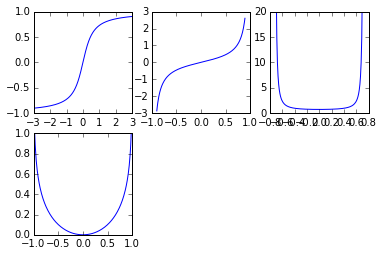

In [3]:
#x=linspace(-3,3,100)
x1 = arange(-3., 3.0, 0.01)
x2= arange(-.9, .9, 0.01)
x3= arange(-.75, .75, 0.01)

plt.figure(1)
plt.subplot(231)
plt.plot(x1, g(x1))

plt.subplot(232)
plt.plot(x2, inverseg(x2))

ax1=plt.subplot(233)
plt.plot(x3, Dinverseg(x3))
ax1.set_ylim([0, 20])

ax1=plt.subplot(234)
plt.plot(x1, inig(x1))
ax1.set_ylim([0, 1])

plt.show()

##Main Program illustrating descent with discrete updates

Note that because the dynamics of the graded response Hopfield net are expressed in terms of differential equations, the updating is continuous (rather than asynchronous and discrete). In order to do a digital computer simulation we approximate the dynamics with discrete updates of the neurons' activities.
The following function computes the output just up to the non-linearity. In other words, the Hopfield[] function represents the current input at the next time step to the op-amp model of the ith neuron. We represent these values of u by  uu, and the weights by matrix Tm. 

In [4]:
niter=1000
dt = 0.01
Tm = array([[0.,1.],[1.,0.]])
V =array([0.2,-0.5])
uu = inverseg(V)
uu1=uu
result = array([uu1])

$$C_i {du_i \over dt} = \sum_j T_{ij} V_j - {u_i \over R_i} + I_i$$

$$V_i = g(u_i)$$

This is discrete-time approximation that follows from the above update equations with the capacitances $C_i$ and resistances $R_i$ set to 1. 

Let's accumulate some results for a series of iterations. Then we will plot the pairs of activities of the two neurons over the iterations. The next line randomly samples the two neurons for asynchronous updating.

In [5]:
def hopfield(u,i):
    return u[i] + dt*(dot(Tm,g(u))[i] - u[i])

In [6]:
for i in range(niter):
    k=np.random.randint(0,2)
    uu[k]=hopfield(uu1, k)
    uu1=uu
    result = np.concatenate((result,[uu1]))

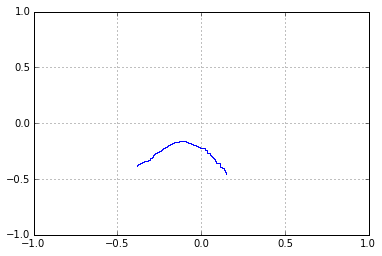

In [7]:
#plt.scatter(result[:,0],result[:,1])
plt.plot(result[:,0],result[:,1])
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.grid()
plt.show()

##Energy landscape

$$E = -{1\over 2} \sum_{i \neq j} T_{ij}V_iV_j + \sum_i (1/R_i) \int_0^{V_i} g_i^{-1}(V)dV + \sum_i I_iV_i$$

Now let's make a contour plot of the energy landscape. We will need a function expression for the integral of the inverse of the g function, call it inig[].  Then define energy[x_,y_] and use plt.contour to map out the energy function.

(We used Mathematica's Integrate[] function to compute the integral of $g^{-1}())$:

$$(a \times \log(\cos(x/a)) \over b$$

In [8]:
def energy(Vv):
    Vv=array(Vv)
    tosum = [inig(Vv)[i] for i in range(len(Vv))]
    tot = np.sum(tosum)
    return -0.5*dot(dot(Tm,Vv),Vv) + tot

In [9]:
delta = .05
xx = np.arange(-1.0, 1.0, delta)
yy = np.arange(-1.0, 1.0, delta)
XX, YY = np.meshgrid(xx, yy)
ZZ=[[log(energy([x,y])) for x in xx] for y in yy]

-c:5: RuntimeWarning: invalid value encountered in log


/usr/local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


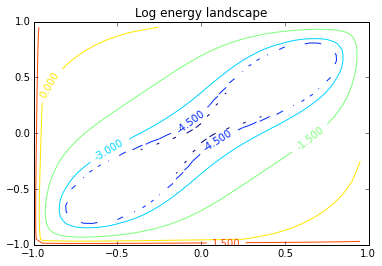

In [10]:
# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(XX, YY, ZZ)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Log energy landscape')